# **Let's play with randomness**

We will simulate:
- A coin toss (count heads)
- Two coins toss (count heads)
- A dice roll
- Two dice roll
- Same sex chindren
- Sum of uniform distributions

## Tossing a single coin

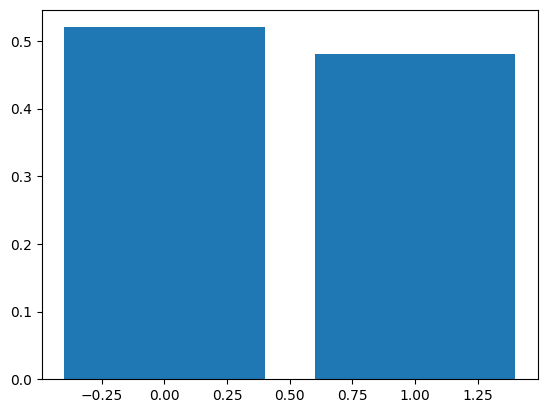

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(prob=0.5):
    # Tossing a single coin
    # prob: probability of success
    if np.random.rand() < prob:
        return 1  # success
    else:
        return 0  # failure

n = 100
coin = np.array([0, 0])
for i in range(n):
    coin[bernoulli()] += 1  # increment in 1 according to bern result
coin = coin / n
p = plt.bar(range(2), coin)

##Pocos intentos dan desviaciones. Mientras mas intentos n mas se equilibran y menos desviaciones. 

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Tossing two coins



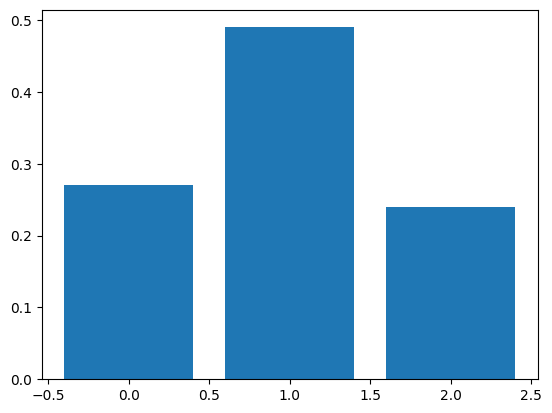

In [16]:
n = 100
two_coins = np.array([0, 0, 0])
for i in range(n):
    two_coins[bernoulli() + bernoulli()] += 1
two_coins = two_coins / n
p = plt.bar(range(3), two_coins)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Let's roll a dice

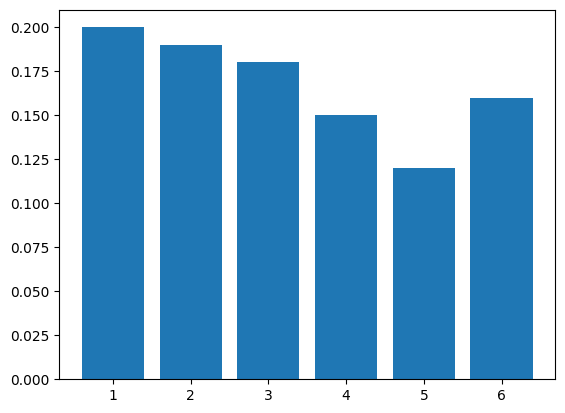

In [17]:
n = 100
dice = np.zeros(6)
for i in range(n):
    di = int(np.floor(np.random.rand()*6))
    dice[di] += 1
dice = dice / n
p = plt.bar(range(1,7), dice)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Two dices

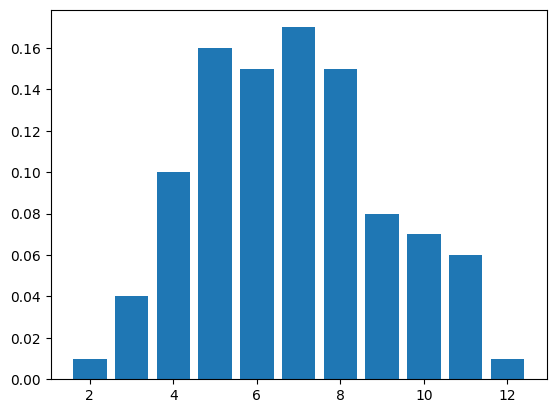

In [18]:
n = 100
dice = np.zeros(11)
for i in range(n):
    di1 = int(np.floor(np.random.rand()*6))
    di2 = int(np.floor(np.random.rand()*6))
    dice[di1+di2] += 1
dice = dice / n
p = plt.bar(range(2,13), dice)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Probability of having three kids of the same sex

**Assignment 1**: How likely is it that a family with three children has all boys or all girls?
Let's assume that a child is equally likely to be a boy or a girl. Instead of observing the result of actual births, a toss of a fair coin could be used to simulate a birth. If the toss results in heads (H), then we could say a boy was born; if the toss results in tails (T), then we could say a girl was born. If the coin is fair (*i.e.*, heads and tails are equally likely), then getting a boy or a girl is equally likely.

In [19]:
rep = 100000
## WRITE YOUR CODE HERE

same_sex = 0 
for i in range(rep):
    n = bernoulli() + bernoulli() + bernoulli()
    if n == 0 or n == 3:
        same_sex += 1

print(same_sex/rep)

genero = np.zeros(3)
suma = 0
for i in range(rep):
    two_coins[0] = bernoulli()
    two_coins[1] = bernoulli()
    two_coins[2] = bernoulli()
    
    if(two_coins[0]==two_coins[1] and two_coins[2] == two_coins[1]):
        suma += 1
print(suma / rep)



## --------------------

0.25133
0.24941


## Sum of continuos uniforms

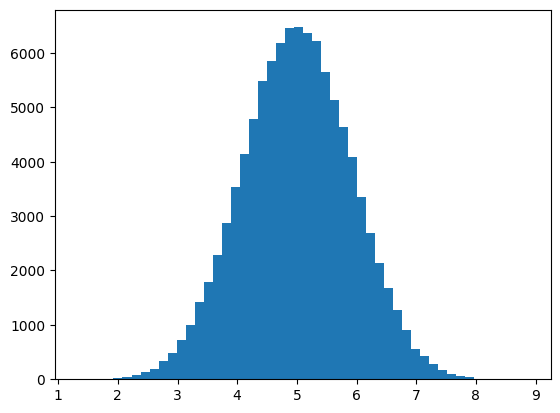

In [20]:
n = 100000  # Sequence length
nu = 10     # number of uniforms in the sum

x = []
for i in range(n):
    x += [sum([np.random.rand() for i in range(nu)])]
p = plt.hist(x, bins=50)

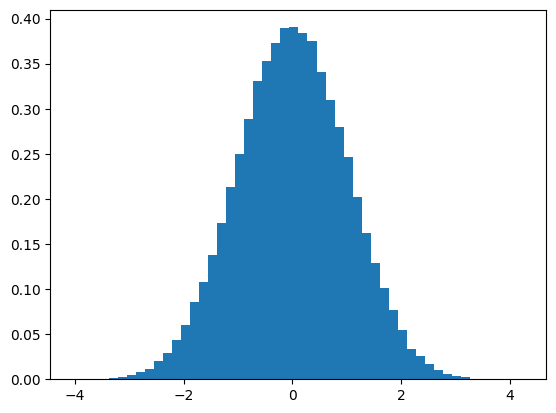

In [21]:
x = np.array(x)
z = (x - np.mean(x))/np.std(x)
p = plt.hist(z, bins=50, density=True)

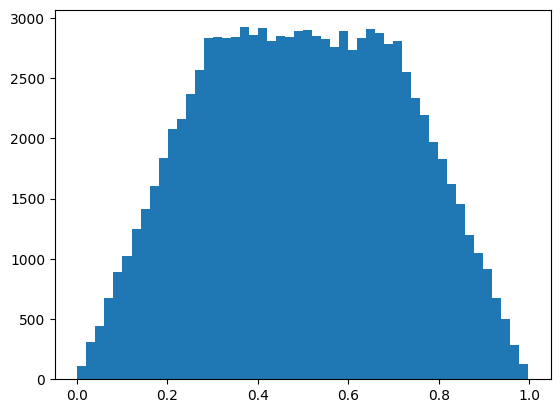

In [22]:
n = 100000  # Sequence length
x = []
for i in range(n):
    x += [0.3*np.random.rand() + 0.7*np.random.rand()]
p = plt.hist(x, bins=50)

## A simple game

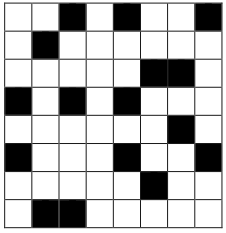

**Assigment 2**: Considering the board shown above, implement the following system: There are 2 mines distributed randomly in the black squares, and the player clicks randomly on the squares (never on the white ones): If there is no mine in the square, it becomes white, otherwise the player loses the game.
If the player manages to click all the squares that do not have a mine, he/she win the game.  Do not take into account the distribution (or proximity) of the black boxes.

In [426]:
## WRITE YOUR CODE HERE
##juego() y devolver si gano o perdio y la cantidad de movimientos realizados. 
## 0 = blanco / 1 = negro sin mina / 2 = negro con mina.
import numpy as np
import random

def juego():
    tablero = np.zeros(64)
    tablero[0] = 1
    tablero[1] = 1
    tablero[2] = 1
    tablero[3] = 1
    tablero[4] = 1
    tablero[5] = 1
    tablero[6] = 2
    tablero[7] = 1
    tablero[8] = 1
    tablero[9] = 1
    tablero[10] = 1
    tablero[11] = 1
    tablero[12] = 1
    tablero[13] = 2
    tablero[14] = 1
    tablero[15] = 1
    #print(tablero)

    clicks = 0
    count = 0
    winLose = 1

    intento = random.sample(range(16), 14)
    while count < 14:
        ##intento = np.random.randint(0, 15)
        #print("intento", intento)
        a = (intento[count])
        
        if tablero[a] == 1:
            tablero[a] = 0
            clicks += 1
        
        elif tablero[a] == 0:
            clicks -= 1
            
        elif tablero[a] == 2:
            clicks +=1
            winLose = 2
            #prnt("Encontraste una mina")
            break

        count += 1
    return clicks, winLose


clicks, winLose = juego()
print("Número de clics:", clicks)
if winLose == 1:
    print("Ganaste")
else:
    print("Perdiste")

## --------------------

Número de clics: 7
Perdiste


**Assignment 3**: What is the probability of winning the game?


In [480]:
## WRITE YOUR CODE HERE
n = 10000
sumatoria = 0
for i in range(n):
    clicks, winLose = juego()
    
    if winLose == 1:
        sumatoria += 1

print (sumatoria)
print (sumatoria/n)
    
## --------------------

82
0.0082


**Assigment 4**: How many clicks on average will a player make until they lose (include the click in which they find the mine)?

In [474]:
## WRITE YOUR CODE HERE
n = 10000
sumatoria = 0

for i in range(n):
    clicks, winLose = juego()
    
    if winLose == 1:
        sumatoria += clicks
    
    elif winLose ==2:
        sumatoria += clicks

    #print("SUM", clicks)

print(sumatoria)
     
print (sumatoria/n)

## --------------------

SUM 14
SUM 4
SUM 2
SUM 5
SUM 4
SUM 1
SUM 2
SUM 6
SUM 5
SUM 8
SUM 1
SUM 3
SUM 4
SUM 13
SUM 1
SUM 4
SUM 8
SUM 7
SUM 10
SUM 3
SUM 7
SUM 6
SUM 8
SUM 3
SUM 7
SUM 8
SUM 9
SUM 2
SUM 11
SUM 2
SUM 5
SUM 7
SUM 2
SUM 6
SUM 12
SUM 1
SUM 3
SUM 4
SUM 3
SUM 8
SUM 8
SUM 1
SUM 4
SUM 10
SUM 5
SUM 1
SUM 3
SUM 5
SUM 2
SUM 7
SUM 10
SUM 2
SUM 3
SUM 11
SUM 1
SUM 4
SUM 14
SUM 4
SUM 2
SUM 1
SUM 1
SUM 4
SUM 8
SUM 3
SUM 13
SUM 11
SUM 10
SUM 4
SUM 3
SUM 14
SUM 8
SUM 4
SUM 5
SUM 13
SUM 3
SUM 1
SUM 2
SUM 3
SUM 11
SUM 6
SUM 11
SUM 8
SUM 4
SUM 3
SUM 3
SUM 5
SUM 4
SUM 7
SUM 5
SUM 14
SUM 5
SUM 8
SUM 12
SUM 3
SUM 1
SUM 7
SUM 14
SUM 1
SUM 12
SUM 13
SUM 13
SUM 2
SUM 2
SUM 2
SUM 6
SUM 2
SUM 5
SUM 7
SUM 5
SUM 1
SUM 7
SUM 7
SUM 1
SUM 6
SUM 3
SUM 3
SUM 9
SUM 2
SUM 1
SUM 4
SUM 7
SUM 3
SUM 4
SUM 4
SUM 7
SUM 10
SUM 4
SUM 1
SUM 7
SUM 3
SUM 1
SUM 2
SUM 1
SUM 6
SUM 5
SUM 1
SUM 8
SUM 9
SUM 2
SUM 6
SUM 4
SUM 6
SUM 4
SUM 5
SUM 7
SUM 11
SUM 12
SUM 7
SUM 4
SUM 14
SUM 10
SUM 14
SUM 13
SUM 9
SUM 2
SUM 1
SUM 7
SUM 5
SUM 2
SUM 14
SUM 4
SUM 